# Marketing Data Analysis
### - Mohamed LAAJAJ


## Introduction

This notebook will accomplish the following task:

**Overall goal:**  
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.  

**Section 01: Exploratory Data Analysis**  
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

**Section 02: Statistical Analysis**  
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.  

* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
* Is there a significant relationship between geographical regional and success of a campaign?

**Section 03: Data Visualization**  
Please plot and visualize the answers to the below questions.  

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?

#### Feature - Description
**AcceptedCmpl** : 1 if costumer accepted the offer in the 1st campaign. 0 otherwise  
**AcceptedCmp2** : 1 if costumer accepted the offer in the 2nd campaign, 0 ot herwise  
**AcceptedCmp3** : 1 if costumer accepted the offer in the 3rd campaign, 0 otherwise  
**AcceptedCmp4** : 1 if costumer accepted the offer in the 4th campaign, 0 otherwise  
**AcceptedCmp5** : 1 if costumer accepted the offer in the 5th campaign, 0 otherwise  
**Response (target)** : 1 if costumer accepted the offer in the last campaign, 0 otherwise  (notre targer - Y )  
**Complain** : if costumer complained in the last 2 years  
**DtCustomer** : date of customer's enrollment with the company  
**Education** : customer's level of education  
**Marital** : customer's marital status  
**Kidhome** : number of small children in customer's househok  
**Teenhome** : number of teenagers in customer's household  
**Income** : customer's yearly bousehold income  
**Mnt FishProducts** : amount spent on fish products in the last 2 years  
**Mnt Ment Products** : amount spent on meat products in the last 2 years  
**Mnt Fruits** : amount spent on fruits in the last 2 vears  
**MutSweet Products** : amount spent on sweet products in the last 2 years  
**Mnt Wines** : amount spent on wines in the last 2 vears  
**MntGoldProds** : amount spent on gold products in the last 2 years  
**NumDealsPurchases** : number of purchases made with discount  
**NumCatalogPurchases** : number of purchases made using catalogue  
**NumStorePurchases** : number of purchases made directly in stores  
**Num Web Purchases** : nuber of purchases made through company's web site  
**Num WebVisitsMouth** : number of visits to company's web site in the last month   
**Recency** : number of days since the last purchase  

In [188]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

In [189]:
df = pd.read_csv("/Users/laajajmohamed/Library/CloudStorage/OneDrive-sdctl/Data/Projet 3 - Marketing Analysis/CSV/marketing_data.csv")

# Section 1: Exploration des données 

### Ce dataset contient-il des valeurs nulles ? Extrêmes ? Comment traiter ces données ? 

#### a) Valeurs nulles 
* Commençons par identifier les valeurs nulles 

In [190]:
# Affichage de nos données 
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [192]:
column_list = []
for column in df.columns:
    nb = df[column].isnull().sum()
    if nb>0:
        print(column)
        print(nb)
        column_list.append(column)
    

 Income 
24


Nous avons uniquement 24 qui concernent toutes la colonne 'Income'.

In [193]:
df.columns = df.columns.str.replace(" ", "")

Retrait des potentiels espaces présents dans les noms des colonnes. Il y avait des espaces présents notamment dans la colonne 'Income'

In [194]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [195]:
df.Income.dtypes

dtype('O')

Les données Income sont sous forme $84,835.00. Nous voulons convertir la colonne en float.

In [197]:
def convert_income(X):
    X = str(X).replace("$", "")
    X = str(X).replace(",", "")
    return X

df['Income'] = df.Income.apply(convert_income).astype('float')
df.Income.dtypes

dtype('float64')

Text(0.5, 1.0, 'Distribution des revenus')

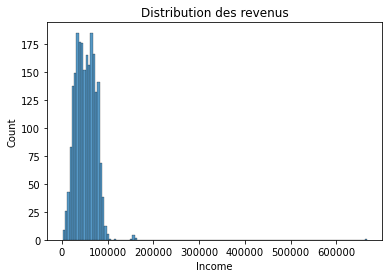

In [204]:
# Distribution des revenus 
sns.histplot(df.Income)
plt.title("Distribution des revenus")

<AxesSubplot:ylabel='Income'>

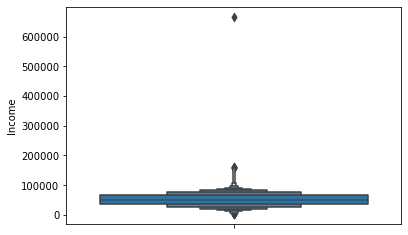

In [208]:
# Boxplot des revenus 
sns.boxenplot(y=df.Income)

* Présence de valeurs extrêmes. Nous allons remplacer les valeurs nulles par la médiane pour éviter d'impacter la moyenne générale.

In [209]:
df.Income.fillna(df.Income.median(), inplace=True)

Ananlysons la distribution de l'ensemble de nos variables

In [243]:
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes( np.number)

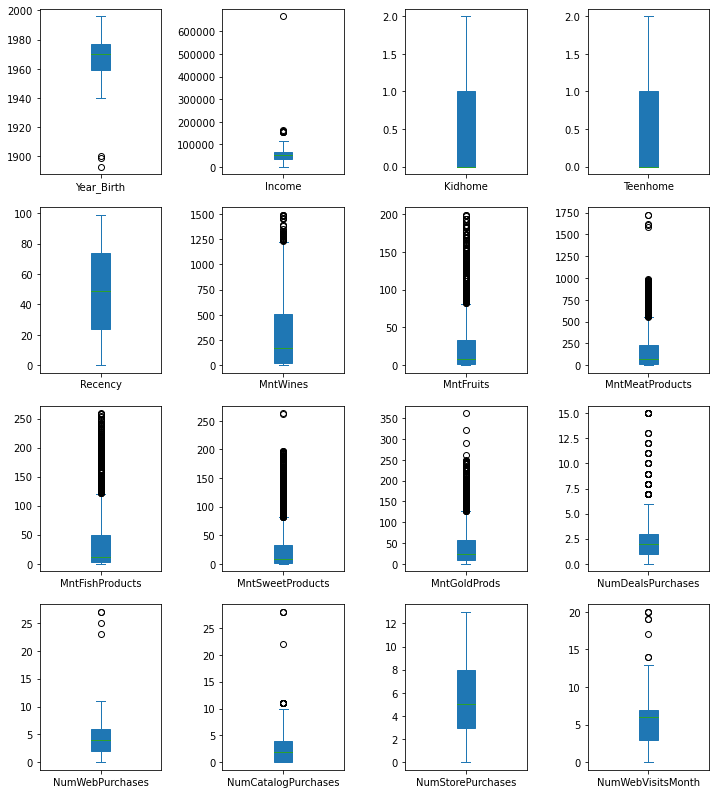

In [244]:
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);


Quelques remarques:
* Nous avons des dates de naissance inférieures à 1900
* Des valeurs extrêmes, comme noté auparavant, pour Income

<AxesSubplot:>

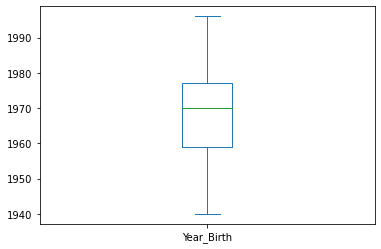

In [256]:
df = df[df.Year_Birth >1900].reset_index(drop=True)
df.Year_Birth.plot(kind='box')

In [268]:
df = df[df.Income < df.Income.max()]

<AxesSubplot:>

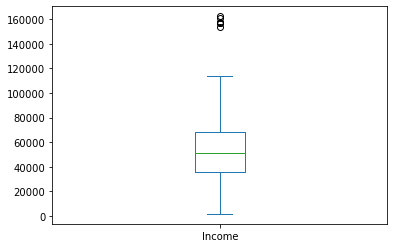

In [270]:
df.Income.plot(kind='box')

Création de nouvelles colonnes

* Selection  des colonnes 

In [293]:
# Montant Total dépensé
Mnt = [ x for x in df.columns if x.startswith('Mnt')]

# Total des achats 
Purchases = [ element for element in df.columns if 'Purchases' in element]

# Total des campagnes acceptées 
Campaign = [ element for element in df.columns if 'Cmp' in element] + ['Response']

Mnt, Purchases, Campaign 

(['MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds'],
 ['NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases'],
 ['AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Response'])

* Création des nouvelles colonnes

In [297]:
df['total_mnt'] = df[Mnt].sum(axis=1)

df['total_purchases'] = df[Purchases].sum(axis=1)

df['total_campaign'] = df[Campaign].sum(axis=1)

/var/folders/_2/349zwqzj32s31b0qt0plky9r0000gn/T/ipykernel_67631/3514607342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_mnt'] = df[Mnt].sum(axis=1)
/var/folders/_2/349zwqzj32s31b0qt0plky9r0000gn/T/ipykernel_67631/3514607342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_purchases'] = df[Purchases].sum(axis=1)
/var/folders/_2/349zwqzj32s31b0qt0plky9r0000gn/T/ipykernel_67631/3514607342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [300]:
df.Dt_Customer.dtypes

dtype('O')

In [303]:
df['year'] = pd.DatetimeIndex(df["Dt_Customer"]).year

/var/folders/_2/349zwqzj32s31b0qt0plky9r0000gn/T/ipykernel_67631/368386655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df["Dt_Customer"]).year


In [318]:
df['home'] = df['Kidhome'] + df['Teenhome']

/var/folders/_2/349zwqzj32s31b0qt0plky9r0000gn/T/ipykernel_67631/1450168381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home'] = df['Kidhome'] + df['Teenhome']


* Début de l'analyse 

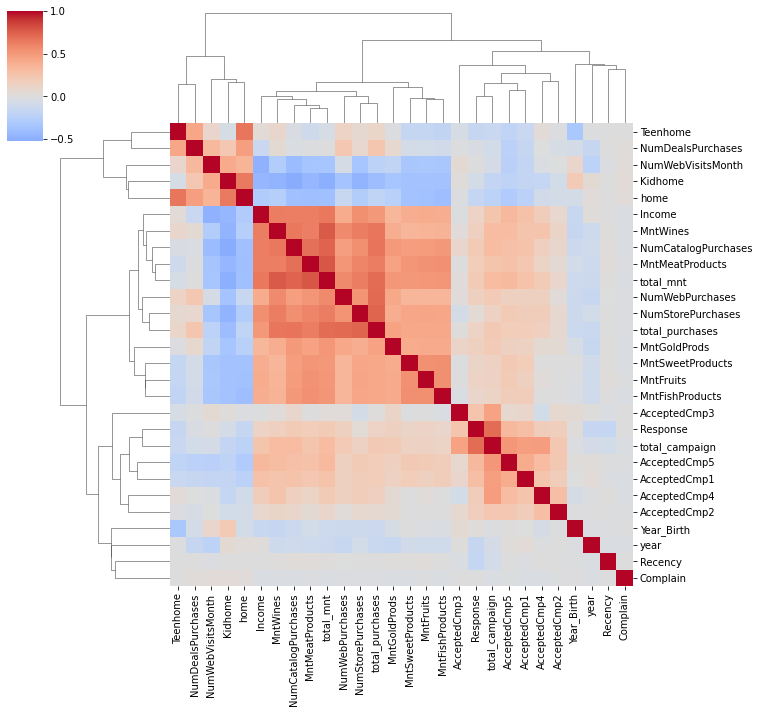

In [327]:
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

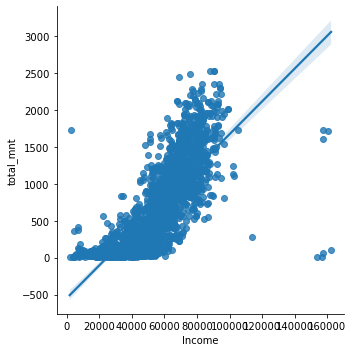

In [314]:
sns.lmplot(x='Income', y='total_mnt', data = df)

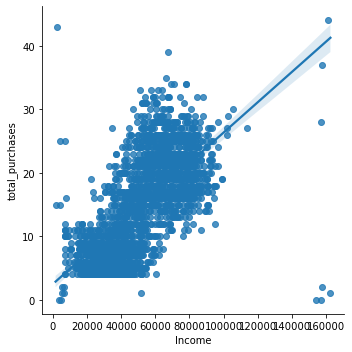

In [315]:
sns.lmplot(x='Income', y='total_purchases', data = df)

<AxesSubplot:xlabel='home', ylabel='total_mnt'>

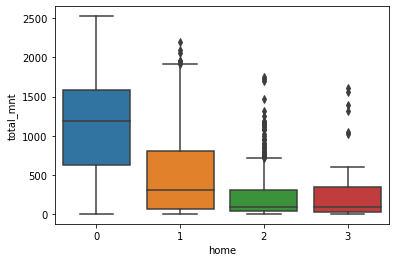

In [322]:
sns.boxplot(x = df.home, y=df.total_mnt)

<AxesSubplot:xlabel='home', ylabel='NumDealsPurchases'>

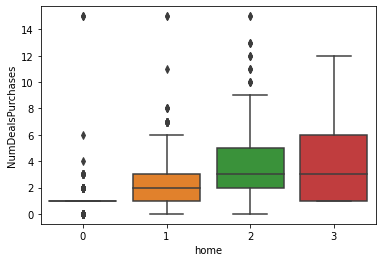

In [324]:
sns.boxplot(x = df.home, y=df.NumDealsPurchases)